In [7]:
import pandas as pd
#importing own scripts
import sys
import os
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), 'scripts'))
import own_scripts

#reading raw data
df = pd.read_json(path_or_buf='../data/cocktail_dataset.json')

# Preprocessing

In [8]:
# preprocessing of dataset as in previous our analyses
df, ingredients = own_scripts.dataset_preprocessing(df)
ingredients_names = own_scripts.ingredients_to_names(ingredients, df['ingredientsID'])

# updating and renaming column
df['ingredientsID'] = ingredients_names
df.rename(columns={'ingredientsID': 'ingredients'}, inplace=True)

# Dividing into clusters by ingredients list
We divide our list of cocktails to clusters by counting similarity between used ingredients.

In [12]:
df['cluster'] = own_scripts.clusterization(df, clusters=3)
df.head()

C:\Users\01sok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,id,name,category,glass,instructions,ingredients,cluster
0,11000,Mojito,Cocktail,Highball glass,Muddle mint leaves with sugar and lime juice. Add a splash of soda water and fill the glass with cracked ice. Pour the rum and top with soda water. Garnish and serve with straw.,"Soda water, Light Rum, Lime, Mint, Sugar",0
1,11001,Old Fashioned,Cocktail,Old-fashioned glass,"Place sugar cube in old fashioned glass and saturate with bitters, add a dash of plain water. Muddle until dissolved.\r\nFill the glass with ice cubes and add whiskey.\r\n\r\nGarnish with orange twist, and a cocktail cherry.","Water, Sugar, Angostura Bitters, Bourbon",1
2,11002,Long Island Tea,Ordinary Drink,Highball glass,Combine all ingredients (except cola) and pour over ice in a highball glass. Add the splash of cola for color. Decorate with a slice of lemon and serve.,"Light Rum, lemon, Vodka, Gin, Tequila, Coca-Cola",0
3,11003,Negroni,Ordinary Drink,Old-fashioned glass,"Stir into glass over ice, garnish and serve.","Sweet Vermouth, Gin, Campari",2
4,11004,Whiskey Sour,Ordinary Drink,Old-fashioned glass,"Shake with ice. Strain into chilled glass, garnish and serve. If served 'On the rocks', strain ingredients into old-fashioned glass filled with ice.","Powdered Sugar, lemon, Blended Whiskey, Cherry",1


# Clustered data on a grid

C:\Users\01sok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


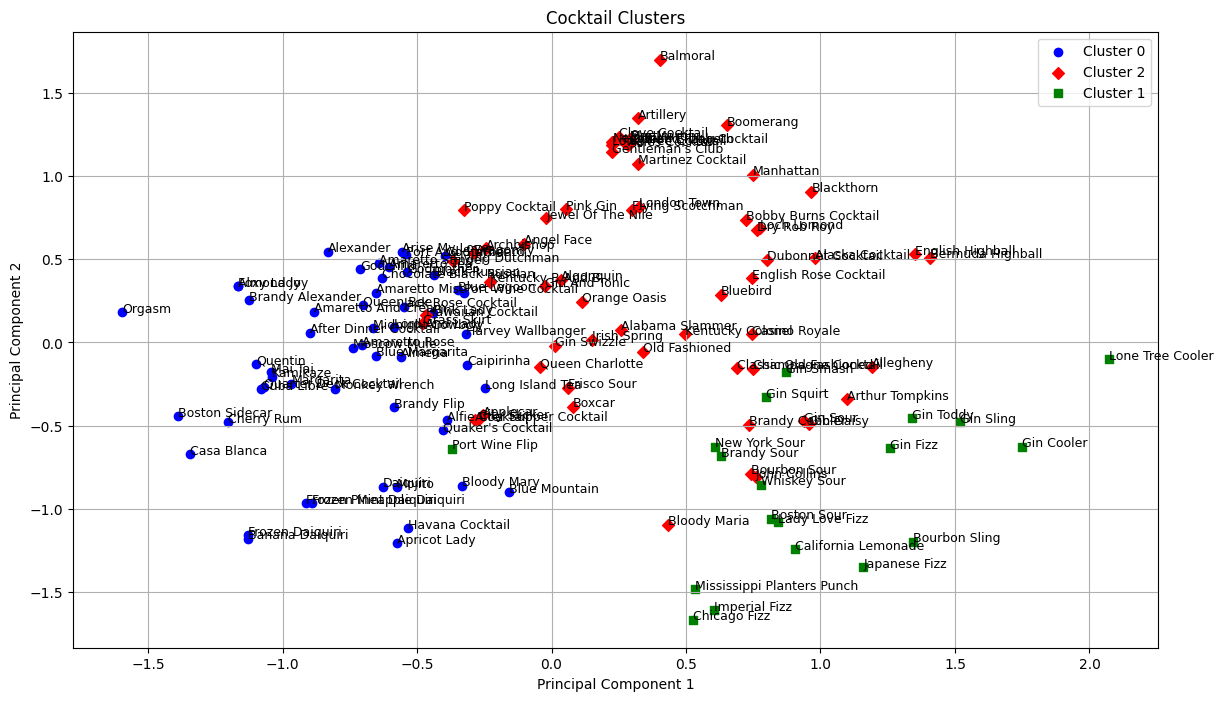

In [15]:
ax = own_scripts.plot_cocktail_clusters(df, n_clusters=3, print_labels=True)
own_scripts.plt.show()

# Recommending similar cocktails

In [11]:
# specify base cocktail
similar_to = 'Apricot Lady'


#-------------------------------------------------
own_scripts.print_similar_cocktails(df, similar_to)

Your cocktail:


,id,name,category,glass,instructions,ingredients,cluster
29,11050,Apricot Lady,Ordinary Drink,Old-fashioned glass,"In a shaker half-filled with ice cubes, combine the rum, apricot brandy, triple sec, lemon juice, and egg white. Shake well. Strain into an old-fashioned glass almost filled with ice cubes. Garnish with the orange slice.","Apricot Brandy, Egg White, Lemon Juice, Light Rum, Orange, Triple Sec",1


Suggested coctails (most similar at the top):


,id,name,category,glass,instructions,ingredients,cluster
0,11011,After Supper Cocktail,Ordinary Drink,Cocktail glass,"Shake all ingredients with ice, strain into a cocktail glass, and serve.","Apricot Brandy, Lemon Juice, Triple Sec",1
1,11251,City Slicker,Ordinary Drink,Cocktail glass,"In a shaker half-filled with ice cubes, combine all of the ingredients. Shake well. Strain into a cocktail glass.","Brandy, Lemon Juice, Triple Sec",1
2,11149,Boxcar,Ordinary Drink,Whiskey sour glass,"In a shaker half-filled with ice cubes, combine all of the ingredients. Shake well. Strain into a sour glass.","Gin, Egg White, Grenadine, Lemon Juice, Triple Sec",1


#### Observation: In most of the suggestions clusters are the same as in the original drink.